# Hierarchical Clustering

### Step 1 – Import Necessary Libraries


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

### Step 2 – Load and Preprocess the Dataset


In [3]:
df = pd.read_csv("/content/driver_data.csv")
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [4]:
print(df.shape)

(4000, 2)


In [5]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

### Step 3 – Perform Hierarchical Clustering and Plot the Dendrogram


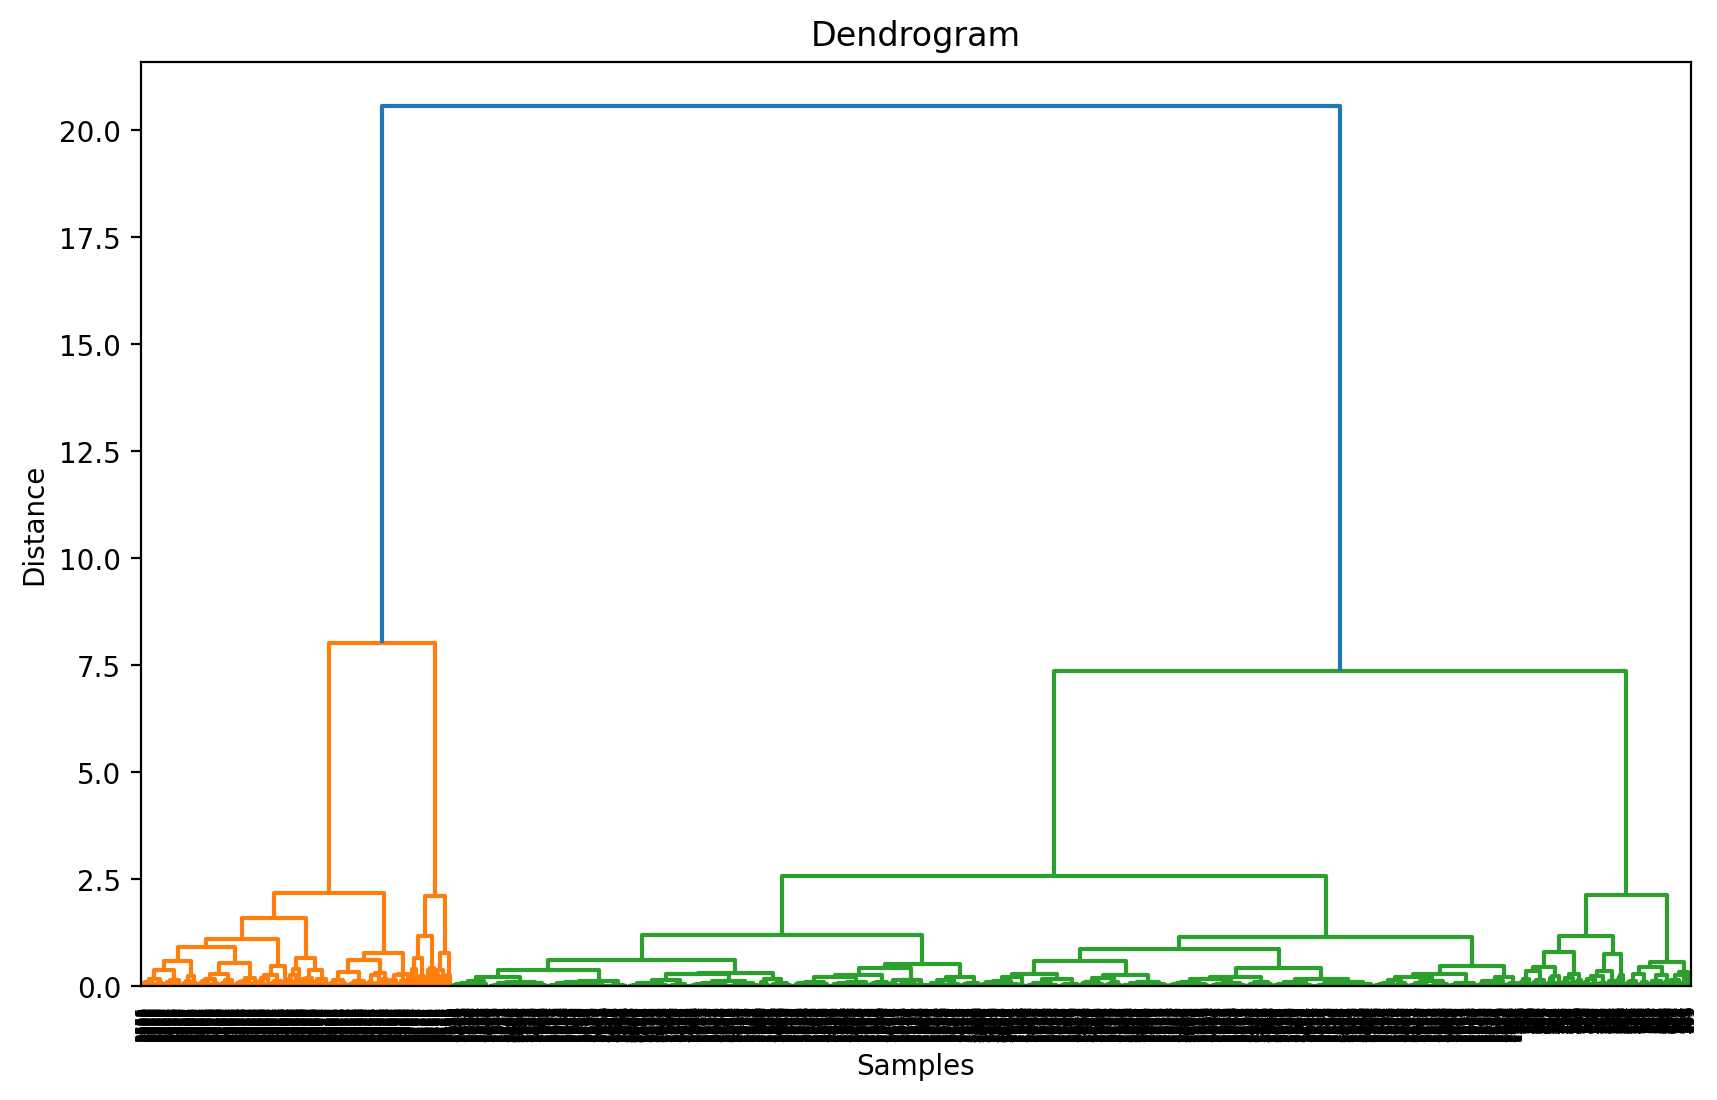

In [6]:
# Calculate linkage matrix
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Truncating the Dendrogram for Easier Visualization


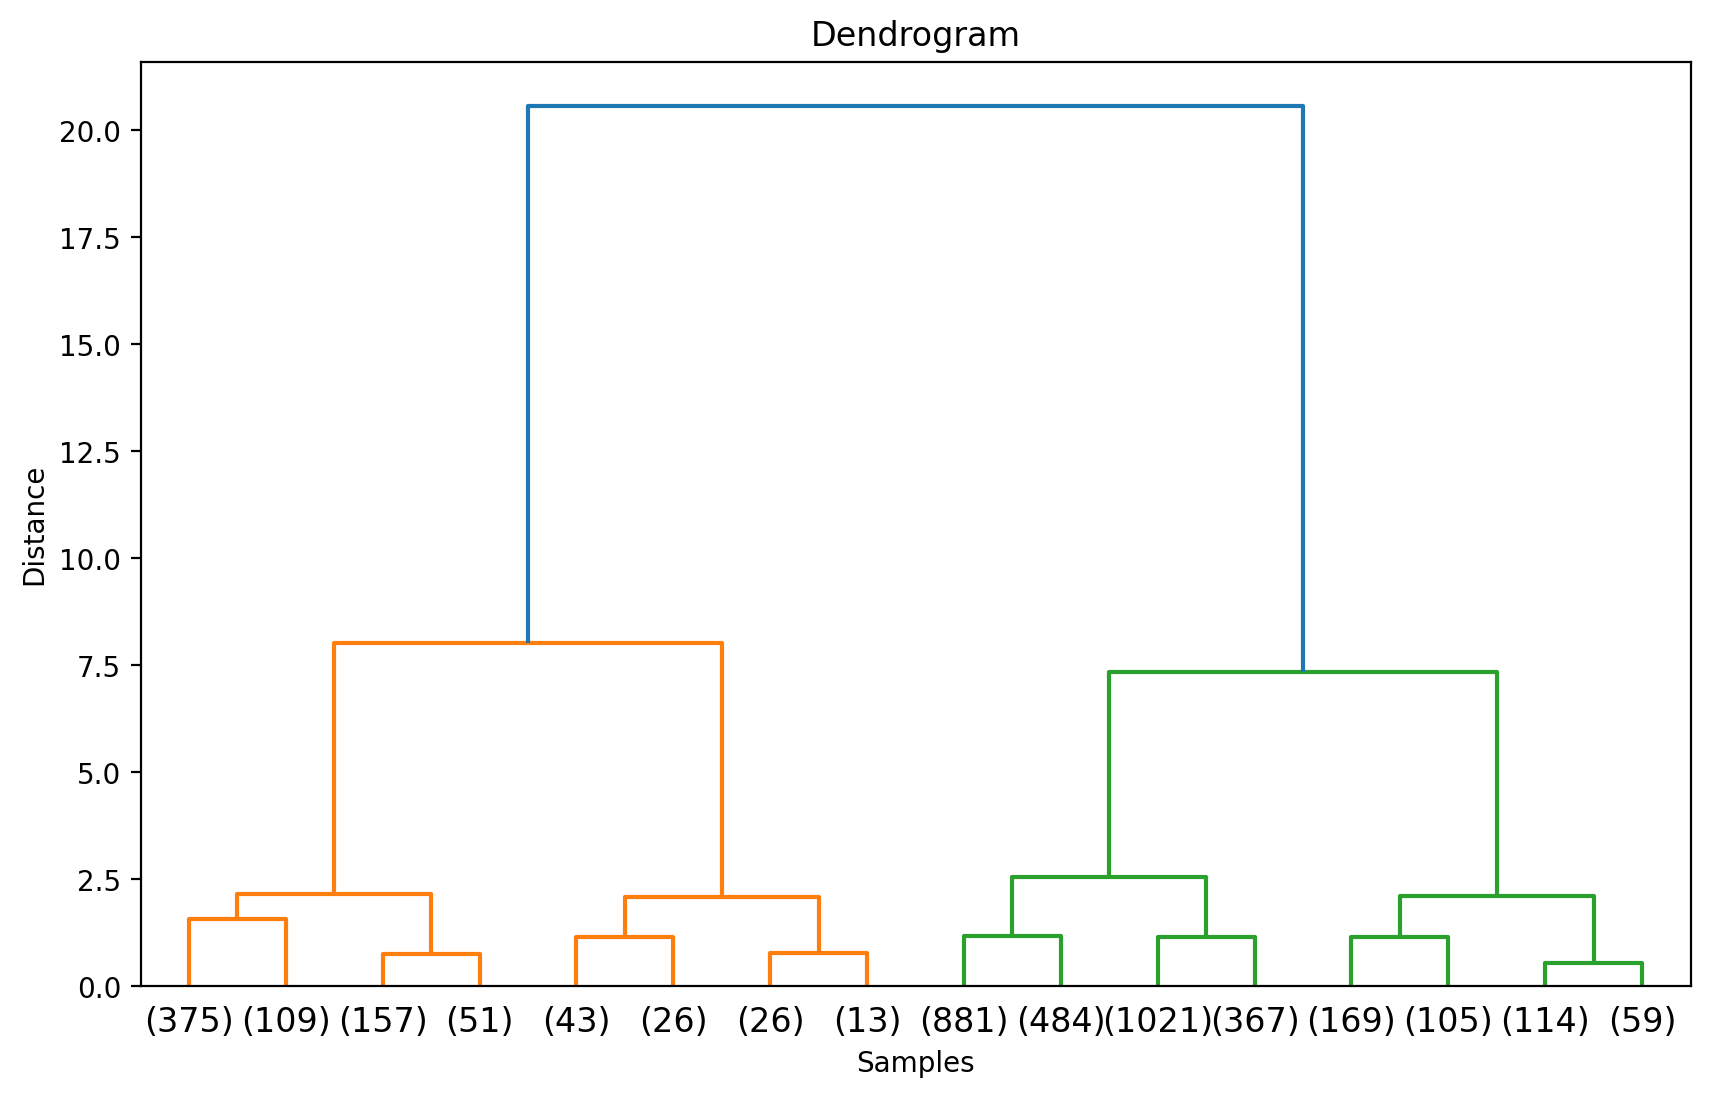

In [7]:
# Calculate linkage matrix
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6),dpi=200)
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3, show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Step 4 – Identify the Optimal Number of Clusters

The optimal number of clusters is 3.

### Step 5 – Form the Clusters

In [9]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold distance based on the dendrogram
threshold_distance = 3.5

# Cut the dendrogram to get cluster labels
cluster_labels = fcluster(linked, threshold_distance, criterion='distance')

# Assign cluster labels to the DataFrame
df['cluster'] = cluster_labels

In [10]:
print(df['cluster'])

0       1
1       1
2       1
3       1
4       1
       ..
3995    4
3996    4
3997    4
3998    4
3999    4
Name: cluster, Length: 4000, dtype: int32


### Step 6 – Visualize the Clusters


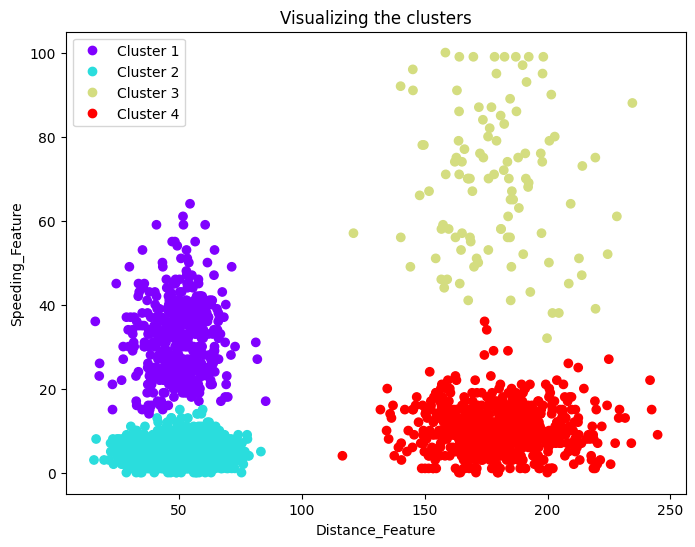

In [11]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df['Distance_Feature'], df['Speeding_Feature'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.title('Visualizing the clusters')

# Add legend
# Determine the number of clusters in your data
n_clusters = len(df['cluster'].unique())

legend_labels = [f'Cluster {i + 1}' for i in range(n_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()